# Data Mining Process

**Author: Sungkyung Shon**

**April, 2023**

# Abstract

To effectively identify linear B-cell epitopes, we present a comprehensive data mining approach that includes data exploration, preprocessing, feature selection, imbalanced classification, model tuning, and pipeline development. Using cutting-edge machine learning algorithms and dimensionality reduction techniques, our method outperforms traditional approaches in predicting linear B-cell epitopes.The proposed methodology provides a robust and efficient solution for accelerating the discovery of linear B-cell epitopes, which will eventually contribute to the development of novel vaccines and therapeutics in the fight against various diseases.

# 1. Introduction

Like any data analysis, data mining is a process; rarely is a single step sufficient. It makes use of a variety of techniques, including classification, clustering, association rule learning, and anomaly detection. Using five different training datasets, we aim to create an efficient data mining pipeline for predicting linear B-cell epitopes in the Alphavirus genus. We will concentrate on the first and second datasets. Our pipeline will be built to predict previously unknown epitopes, which will aid in vaccine and diagnostic development. For testing the pipeline's performance, a validation dataset (df holdout.csv) without the Class attribute is provided. This report aims to demonstrate the pipeline's ability to predict epitopes in Alphavirus proteins.

In [ ]:
pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import csv as csv 
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import datetime
import os
import warnings
import re
import altair as alt
import matplotlib.pyplot as plt                        # For plotting data
import seaborn as sns                                     # For plotting data

from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier      #DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier   #RandomForestClassifier
from sklearn.metrics import roc_auc_score
from boruta import BorutaPy
from imblearn.under_sampling import RandomUnderSampler   #RandomUnderSampler
from sklearn.linear_model import LogisticRegression      #LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline     #pipeline
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GroupKFold  # For optimization
from pandas import DataFrame                       # For dataframes
from numpy import ravel                                  # For matrices
from sklearn.model_selection import train_test_split    # For train/test splits
from sklearn.neighbors import KNeighborsClassifier    # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline                                  # For setting up pipeline
from sklearn.preprocessing import Normalizer, StandardScaler, PowerTransformer, MaxAbsScaler, LabelEncoder# Various pre-processing steps
from sklearn.feature_selection import mutual_info_classif 
%matplotlib inline

warnings.filterwarnings("ignore")
from sklearn.model_selection import GroupShuffleSplit

# Load dataset
df = pd.read_csv('df_training_level2.csv', low_memory = False)

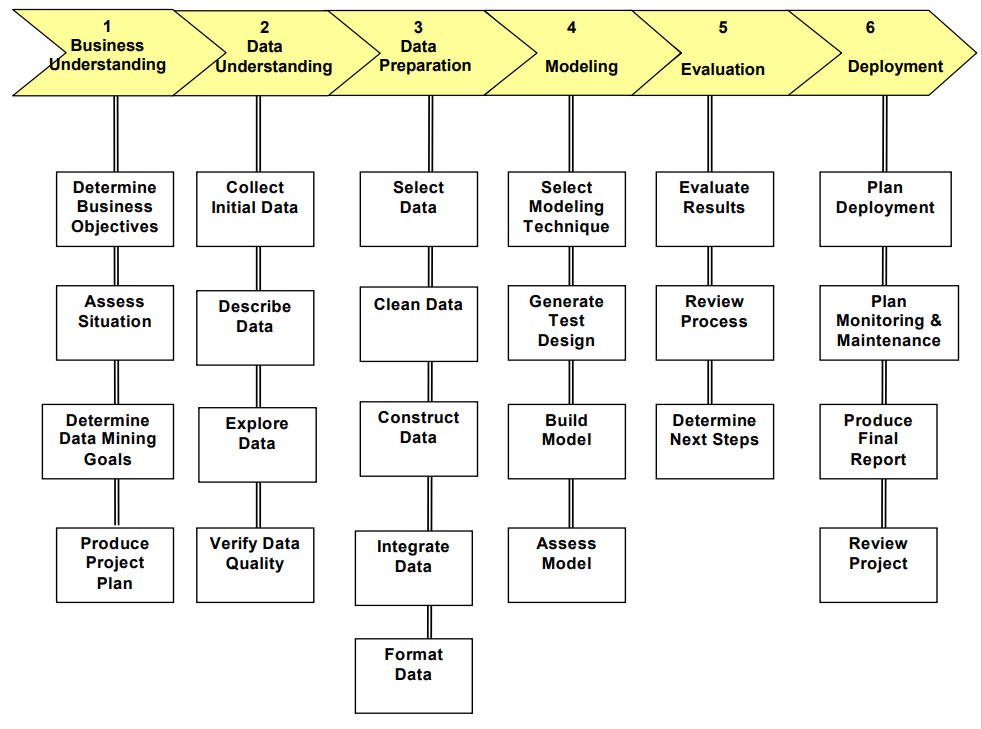

Fig1. CRISP-DM Data Mining Process Methodology

After setting goals at the business stage, select and organize data. Data integration of multiple databases is included. We select data mining techniques and generate tests to evaluate the selected model. The data comprehension step begins with data collecting.

# 2. Data Exploration

The dataset used in this study comes from "df_training_level2". Exploratory Data Analysis(EDA) was performed using several visualisation approaches, including scatter plots, to comprehend the dataset and its properties better. EDA is an important stage in data analysis. It enables researchers to obtain a better grasp of their data before applyingg more advanced statistical techniques. The data set must initially be divided into three parts: the training set, the test set, and the evaluation set. They should not have any records in common because each collection serves a separate purpose.

**After filtering a column containing the prefix 'feat_esm1b_', create a list of column names beginning with 'feat_esm1b_', and use the list of column names to create a new DataFrame called 'filtered_df' that contains only the functional columns.**

In [ ]:
# Remove the information columns and the 'Class' column
df_features = df.filter(regex='feat_esm1b_')
feature_columns = [col for col in df.columns if col.startswith('feat_esm1b_')]
filtered_df = df[feature_columns]
class_column = df['Class']
display(filtered_df.head())

,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,feat_esm1b_9,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
0,-0.021067,-0.165189,0.173732,0.104066,-0.100211,-0.042768,-0.430647,-0.212912,-0.632184,0.078822,...,-0.070886,-0.017200,-0.117530,-0.007250,-1.071874,-0.519040,-0.308719,-0.281276,-0.256712,0.405690
1,0.026400,0.028715,0.093638,-0.046767,0.072711,-0.321925,-0.314515,0.071320,-0.413840,0.322447,...,0.220630,-0.210780,-0.021335,0.323588,-0.736865,-0.343829,-0.507386,-0.020137,-0.166644,0.751316
2,-0.140944,0.106401,0.205669,0.160118,-0.104789,-0.309539,-0.205587,0.058554,-0.466790,0.148556,...,0.107350,-0.059491,-0.167905,0.257423,-0.930690,-0.271957,-0.133815,0.044392,-0.299376,0.461547
3,0.120088,0.108923,-0.086904,0.196164,-0.251497,-0.205923,-0.483595,0.061114,-0.623314,0.309336,...,0.253621,-0.267090,-0.109026,0.091992,-0.813677,-0.187964,-0.142268,0.091157,-0.436975,0.369129
4,0.083401,0.060489,0.070889,-0.058935,-0.192792,-0.258103,-0.379416,0.123201,-0.570444,0.221958,...,0.027382,0.018629,-0.157104,0.305302,-1.121274,-0.048636,-0.246171,0.147852,-0.299121,0.225209


**-info(): Outputs the size of the rows and columns that make up the df, column names, and data types of the values that make up the column**\
**-isnull(): Indicating if each element has a NaN value**\
**-sum(): Counting the number of missing values in each column**\
**-sort_values(): Sorting the counts of missing values in descending order**

In [ ]:
#specify the number of entries, the number of non-null elements, and the kind of variable.
df.info()
#detect missing values
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4946 entries, 0 to 4945
Columns: 1294 entries, Info_PepID to feat_esm1b_1279
dtypes: float64(1280), int64(4), object(10)
memory usage: 48.8+ MB


feat_esm1b_633    521
feat_esm1b_876    521
feat_esm1b_854    521
feat_esm1b_853    521
feat_esm1b_852    521
                 ... 
Info_type           0
Info_window         0
Info_cluster        0
Class               0
Info_PepID          0
Length: 1294, dtype: int64

**DataFrame information such as the number of items, the number of non-null components, and the type of variable in each column are provided. It also computes the percentage of each column and the number of missing values.**

In [ ]:
# calculate the percentage of missing values, such that we can determine how to deal with variables having a high count
df.isnull().sum()/len(df)*100

Info_PepID           0.000000
Info_organism_id     0.000000
Info_protein_id      0.000000
Info_pos             0.000000
Info_AA              0.000000
                      ...    
feat_esm1b_1275     10.533765
feat_esm1b_1276     10.533765
feat_esm1b_1277     10.533765
feat_esm1b_1278     10.533765
feat_esm1b_1279     10.533765
Length: 1294, dtype: float64

In [ ]:
df.columns

Index(['Info_PepID', 'Info_organism_id', 'Info_protein_id', 'Info_pos',
       'Info_AA', 'Info_pubmed_id', 'Info_epitope_id', 'Info_host_id',
       'Info_nPos', 'Info_nNeg',
       ...
       'feat_esm1b_1270', 'feat_esm1b_1271', 'feat_esm1b_1272',
       'feat_esm1b_1273', 'feat_esm1b_1274', 'feat_esm1b_1275',
       'feat_esm1b_1276', 'feat_esm1b_1277', 'feat_esm1b_1278',
       'feat_esm1b_1279'],
      dtype='object', length=1294)

**print colums starting with 'Info'**

In [ ]:
pattern = re.compile(r'^Info.*')
matching_columns = [col for col in df.columns if pattern.match(col)]
print(matching_columns)

['Info_PepID', 'Info_organism_id', 'Info_protein_id', 'Info_pos', 'Info_AA', 'Info_pubmed_id', 'Info_epitope_id', 'Info_host_id', 'Info_nPos', 'Info_nNeg', 'Info_type', 'Info_window', 'Info_cluster']


**Remove columns beginning with 'Info' from the DataFrame because they are not required for analysis.**

In [ ]:
columns_to_drop = ['Info_PepID', 'Info_organism_id', 'Info_protein_id', 'Info_pos', 'Info_AA', 'Info_pubmed_id', 'Info_epitope_id', 'Info_host_id', 'Info_nPos', 'Info_nNeg', 'Info_type', 'Info_window']

# Drop the specified columns
df = df.drop(columns_to_drop,axis=1)
df

,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
0,34,-1,-0.021067,-0.165189,0.173732,0.104066,-0.100211,-0.042768,-0.430647,-0.212912,...,-0.070886,-0.017200,-0.117530,-0.007250,-1.071874,-0.519040,-0.308719,-0.281276,-0.256712,0.405690
1,34,-1,0.026400,0.028715,0.093638,-0.046767,0.072711,-0.321925,-0.314515,0.071320,...,0.220630,-0.210780,-0.021335,0.323588,-0.736865,-0.343829,-0.507386,-0.020137,-0.166644,0.751316
2,34,-1,-0.140944,0.106401,0.205669,0.160118,-0.104789,-0.309539,-0.205587,0.058554,...,0.107350,-0.059491,-0.167905,0.257423,-0.930690,-0.271957,-0.133815,0.044392,-0.299376,0.461547
3,34,-1,0.120088,0.108923,-0.086904,0.196164,-0.251497,-0.205923,-0.483595,0.061114,...,0.253621,-0.267090,-0.109026,0.091992,-0.813677,-0.187964,-0.142268,0.091157,-0.436975,0.369129
4,34,-1,0.083401,0.060489,0.070889,-0.058935,-0.192792,-0.258103,-0.379416,0.123201,...,0.027382,0.018629,-0.157104,0.305302,-1.121274,-0.048636,-0.246171,0.147852,-0.299121,0.225209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,34,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,34,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4943,34,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4944,34,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
0,34,-1,-0.021067,-0.165189,0.173732,0.104066,-0.100211,-0.042768,-0.430647,-0.212912,...,-0.070886,-0.017200,-0.117530,-0.007250,-1.071874,-0.519040,-0.308719,-0.281276,-0.256712,0.405690
1,34,-1,0.026400,0.028715,0.093638,-0.046767,0.072711,-0.321925,-0.314515,0.071320,...,0.220630,-0.210780,-0.021335,0.323588,-0.736865,-0.343829,-0.507386,-0.020137,-0.166644,0.751316
2,34,-1,-0.140944,0.106401,0.205669,0.160118,-0.104789,-0.309539,-0.205587,0.058554,...,0.107350,-0.059491,-0.167905,0.257423,-0.930690,-0.271957,-0.133815,0.044392,-0.299376,0.461547
3,34,-1,0.120088,0.108923,-0.086904,0.196164,-0.251497,-0.205923,-0.483595,0.061114,...,0.253621,-0.267090,-0.109026,0.091992,-0.813677,-0.187964,-0.142268,0.091157,-0.436975,0.369129
4,34,-1,0.083401,0.060489,0.070889,-0.058935,-0.192792,-0.258103,-0.379416,0.123201,...,0.027382,0.018629,-0.157104,0.305302,-1.121274,-0.048636,-0.246171,0.147852,-0.299121,0.225209


**Split the dataset into training, validation, and test sets so that the class distribution remains within each subset using the GroupShuffleSplit method.**

In [ ]:
# Split dataset into training, validation, and test sets
train_inds, val_inds, test_inds = [], [], []
group_splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_val_inds, test_inds in group_splitter.split(df, groups=df['Info_cluster']):
    train_inds, val_inds = next(GroupShuffleSplit(n_splits=1, test_size=0.25, random_state=42).split(df.iloc[train_val_inds], groups=df.iloc[train_val_inds]['Info_cluster']))
    
train_df = df.iloc[train_inds]
val_df = df.iloc[val_inds]
test_df = df.iloc[test_inds]

In [ ]:
# Check class balance
class_counts = train_df['Class'].value_counts()
print('Class counts:', class_counts)

Class counts: -1    1219
 1     100
Name: Class, dtype: int64


**Ouput information about the DataFrame's first few rows, shapes, and columns. It also generates a count plot to show the distribution of the classes.**

In [ ]:
# Explore the dataset
print(df.head())
print(df.shape)
print(df.info())

   Info_cluster  Class  feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  \
0            34     -1     -0.021067     -0.165189      0.173732   
1            34     -1      0.026400      0.028715      0.093638   
2            34     -1     -0.140944      0.106401      0.205669   
3            34     -1      0.120088      0.108923     -0.086904   
4            34     -1      0.083401      0.060489      0.070889   

   feat_esm1b_3  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  feat_esm1b_7  ...  \
0      0.104066     -0.100211     -0.042768     -0.430647     -0.212912  ...   
1     -0.046767      0.072711     -0.321925     -0.314515      0.071320  ...   
2      0.160118     -0.104789     -0.309539     -0.205587      0.058554  ...   
3      0.196164     -0.251497     -0.205923     -0.483595      0.061114  ...   
4     -0.058935     -0.192792     -0.258103     -0.379416      0.123201  ...   

   feat_esm1b_1270  feat_esm1b_1271  feat_esm1b_1272  feat_esm1b_1273  \
0        -0.070886        -0.017200  

<Axes: xlabel='Class', ylabel='count'>

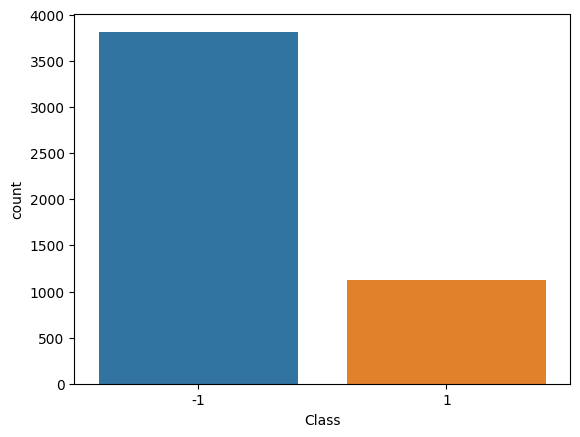

In [ ]:
# Visualize class balance
sns.countplot(x='Class', data=df)

**Identify columns with missing values and then remove rows containing missing values to maintain data integrity.**

In [ ]:
# Investigate missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

feat_esm1b_0       521
feat_esm1b_1       521
feat_esm1b_2       521
feat_esm1b_3       521
feat_esm1b_4       521
                  ... 
feat_esm1b_1275    521
feat_esm1b_1276    521
feat_esm1b_1277    521
feat_esm1b_1278    521
feat_esm1b_1279    521
Length: 1280, dtype: int64


**Calculates the correlation matrix for the functions of DataFrame except for the columns 'Info_cluster' and 'Class'. The correlation matrix is then visualized using a heat map for identify highly correlated features.**

<Axes: >

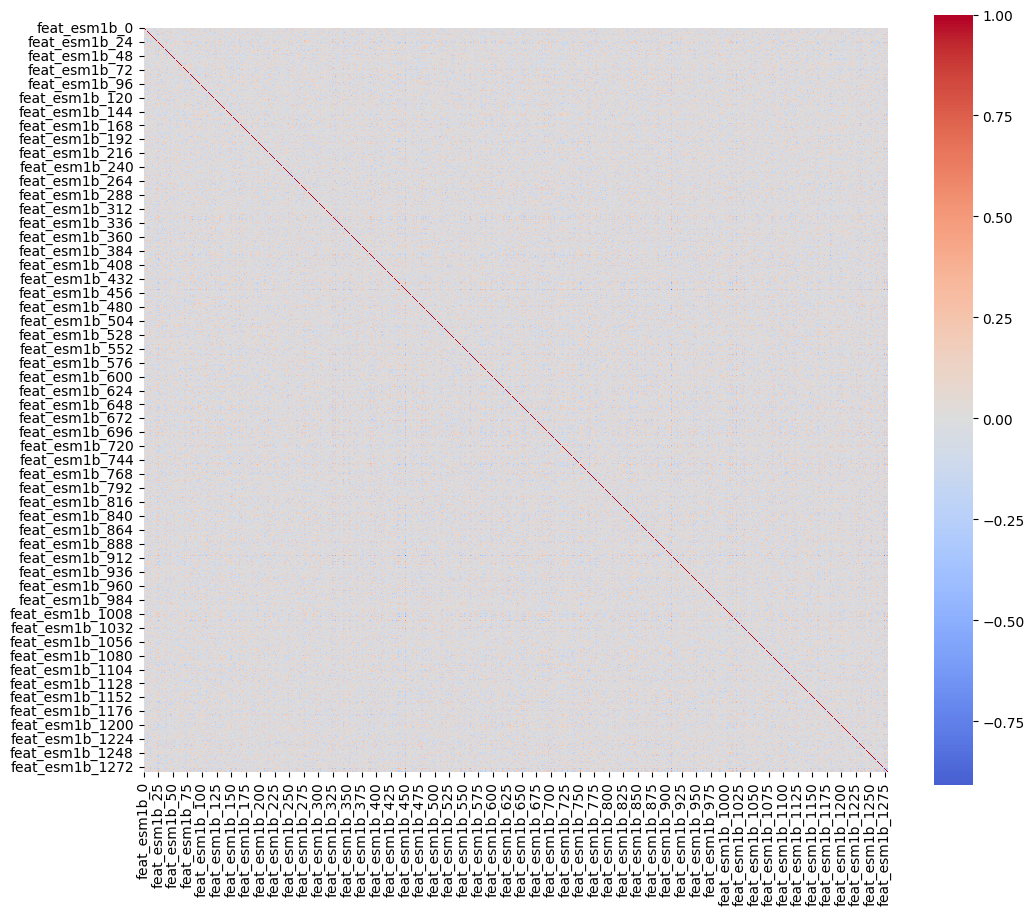

In [ ]:
# Investigate correlations between features
corr_matrix = df.drop(columns=['Info_cluster', 'Class']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Info_cluster         0
Class                0
feat_esm1b_0       521
feat_esm1b_1       521
feat_esm1b_2       521
                  ... 
feat_esm1b_1275    521
feat_esm1b_1276    521
feat_esm1b_1277    521
feat_esm1b_1278    521
feat_esm1b_1279    521
Length: 1282, dtype: int64


In [ ]:
# Drop rows containing missing values
df_no_missing = df.dropna(inplace=True)
print(df_no_missing)

None


**Checks the DataFrame for duplicate rows and prints a boolean mask. It then computes the skewness of each numerical feature and picks those with a high skewness (|skewness| > 1).**

In [ ]:
duplicates = df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
4936    False
4937    False
4938    False
4939    False
4940    False
Length: 4425, dtype: bool


In [ ]:
# Calculate skewness of each numerical feature
skewness = df.skew()
print(skewness)

Info_cluster       1.149841
Class              1.217974
feat_esm1b_0      -0.421509
feat_esm1b_1      -0.240542
feat_esm1b_2      -0.015474
                     ...   
feat_esm1b_1275    0.516030
feat_esm1b_1276    0.184362
feat_esm1b_1277   -0.582846
feat_esm1b_1278   -0.545436
feat_esm1b_1279   -1.200152
Length: 1282, dtype: float64


In [ ]:
# Select features with high skewness values (|skewness| > 1)
high_skewness = skewness[abs(skewness) > 1]
print(high_skewness)

Info_cluster       1.149841
Class              1.217974
feat_esm1b_330    -1.085124
feat_esm1b_450     2.250531
feat_esm1b_518    -1.021827
feat_esm1b_769    -1.128358
feat_esm1b_822    -1.004880
feat_esm1b_827    -1.145468
feat_esm1b_908    -1.636618
feat_esm1b_1013   -1.534103
feat_esm1b_1270    1.073354
feat_esm1b_1274    1.132452
feat_esm1b_1279   -1.200152
dtype: float64


**t-SNE, a dimension reduction technique, is used to visualise the data as a two-dimensional plot.**

In [ ]:
# Apply t-SNE to the data
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df)

t-SNE (t-Distributed Stochastic Neighbor Embedding)is ideal for visualising complex datasets because it reveals the underlying structure and relationships between data points. t-SNE facilitates the interpretation and identification of patterns, clusters, and outliers by transforming high-dimensional data into a lower-dimensional space.

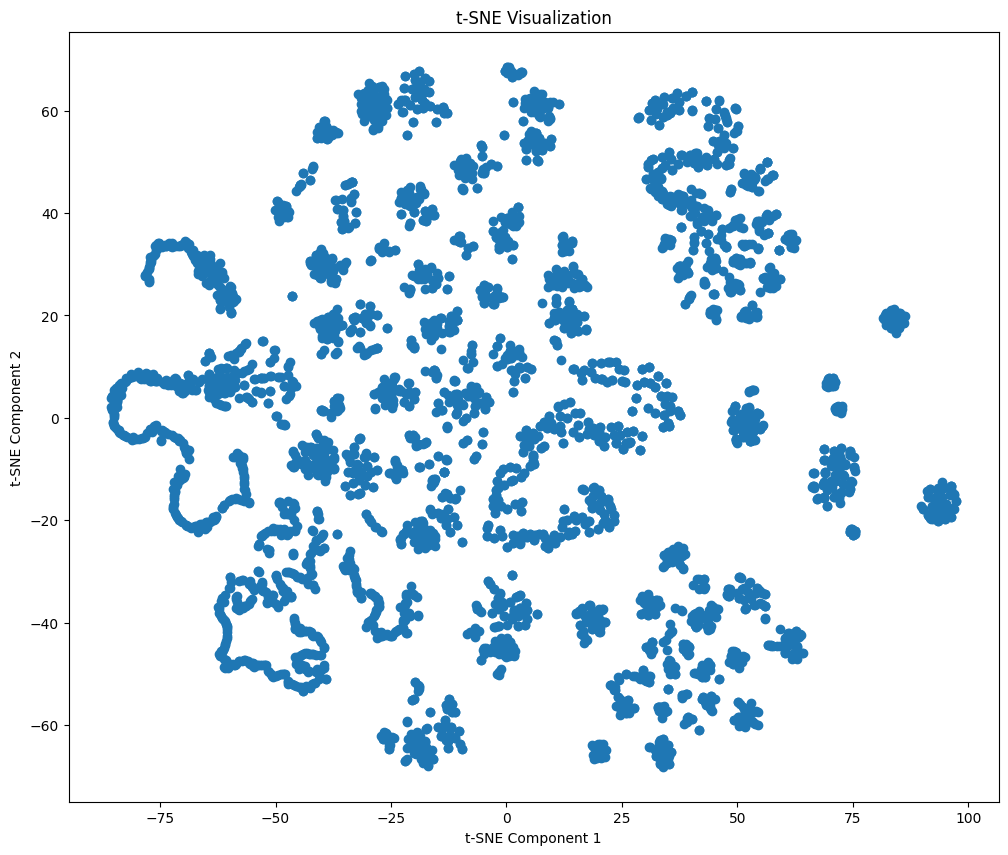

In [ ]:
# Plot the t-SNE results
plt.figure(figsize=(12, 10))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization")
plt.show()

**apply t-SNE separately to training and validation sets and visualize the data distribution and structure as a two-dimensional plot.**

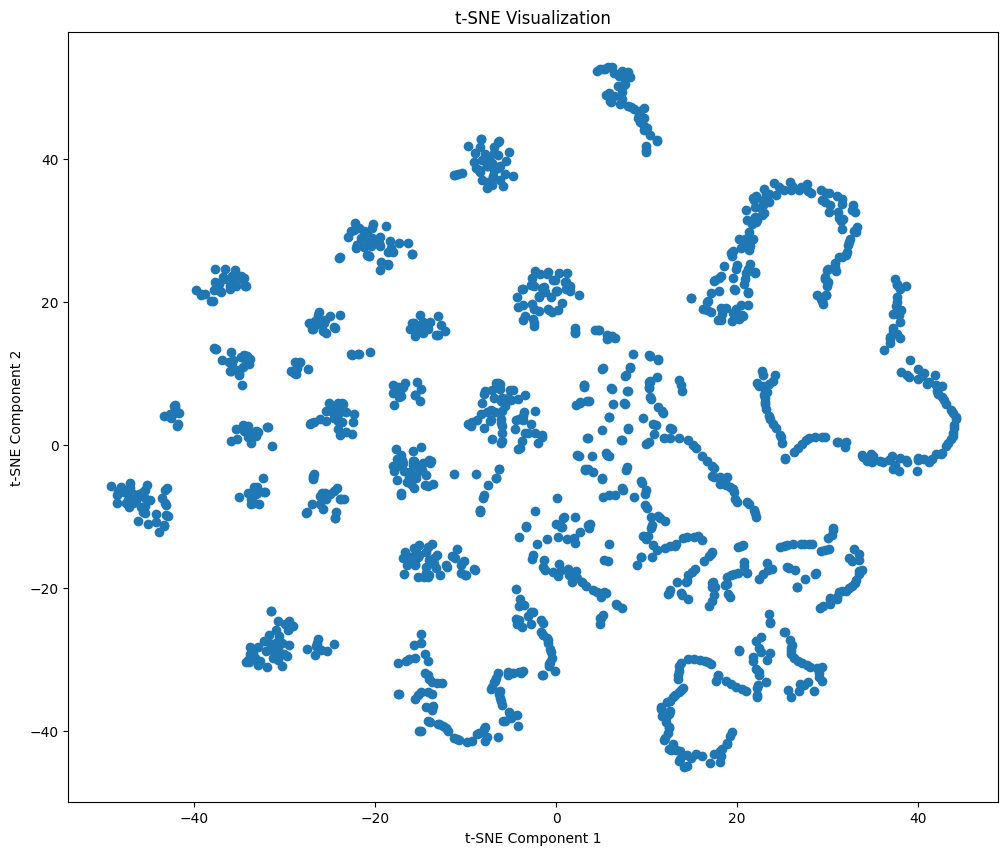

In [ ]:
# Apply t-SNE to the data
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(train_df)
# Plot the t-SNE results
plt.figure(figsize=(12, 10))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization")
plt.show()

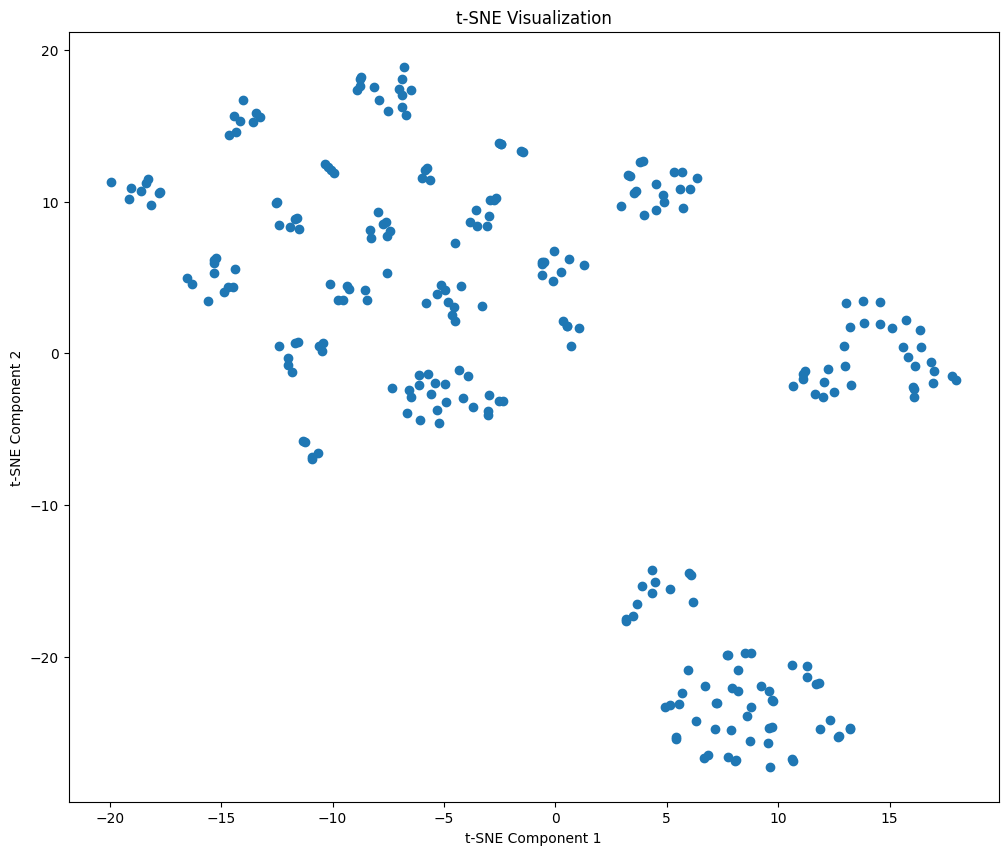

In [ ]:
# Apply t-SNE to the data
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(val_df)
# Plot the t-SNE results
plt.figure(figsize=(12, 10))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization")
plt.show()

**Calculates data sets such as mean, max, standard deviation, and range.**

In [ ]:
# Calculate descriptive statistics
stats = df.describe()
print(stats)
max_values = df.max()
min_values = df.min()

       Info_cluster        Class  feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  \
count   4425.000000  4425.000000   4425.000000   4425.000000   4425.000000   
mean      85.244972    -0.520000      0.030755      0.147561      0.133156   
std       77.937873     0.854263      0.174217      0.164273      0.183189   
min       34.000000    -1.000000     -0.864607     -0.728582     -0.746146   
25%       34.000000    -1.000000     -0.072870      0.052165      0.016922   
50%       35.000000    -1.000000      0.041457      0.153511      0.129611   
75%      150.000000    -1.000000      0.150047      0.247211      0.246416   
max      320.000000     1.000000      0.729142      1.169529      0.897457   

       feat_esm1b_3  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  feat_esm1b_7  \
count   4425.000000   4425.000000   4425.000000   4425.000000   4425.000000   
mean       0.056310     -0.135560     -0.072281     -0.133773     -0.022093   
std        0.158925      0.171123      0.160774      0.18317

**Create a linear chart that displays the maximum and minimum values.**

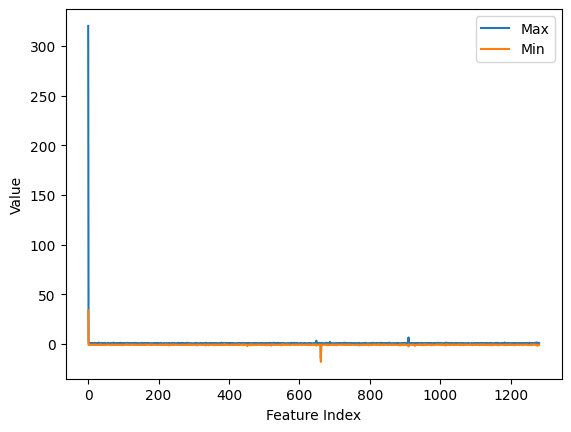

In [ ]:
# Create a line chart to display max and min values
fig, ax = plt.subplots()
ax.plot(max_values.values, label='Max')
ax.plot(min_values.values, label='Min')
ax.set_xlabel('Feature Index')
ax.set_ylabel('Value')
ax.legend()
plt.show()

**Calculate the range (maximum - minimum) of each numeric function.**

In [ ]:
# Calculate the range (max - min) for each numerical feature
ranges = df.max() - df.min()
print(ranges)

Info_cluster       286.000000
Class                2.000000
feat_esm1b_0         1.593750
feat_esm1b_1         1.898111
feat_esm1b_2         1.643603
                      ...    
feat_esm1b_1275      1.504783
feat_esm1b_1276      1.471606
feat_esm1b_1277      1.263231
feat_esm1b_1278      1.725189
feat_esm1b_1279      1.940035
Length: 1282, dtype: float64


# 3. Data Preprocessing

Many factors influence data value, including accuracy, completeness, consistency, and timeliness. If the data meets the intended goal, it must be high quality. Therefore, in this study, the data set was cleaned up by processing missing values, eliminating duplication, and dealing with outliers. 

**Group DataFrame into columns 'Info_cluster' and calculate the number of occurrences of each target class in each group for understanding the distribution of target classes within different clusters.**

In [ ]:
# Group by Info_cluster and get value counts of the target class within each group
class_balance = df.groupby('Info_cluster')['Class'].value_counts()
class_balance

Info_cluster  Class
34            -1       1083
               1         62
35            -1       1513
               1        110
36            -1        183
               1         61
150           -1        283
               1        281
198            1         31
              -1         12
199            1         30
204           -1        289
               1        227
215            1         20
222            1         15
229            1         54
232            1         45
256            1          7
264            1          8
298            1         69
320            1         42
Name: Class, dtype: int64

**Calculate the totl number od examples in DataFrame, and then calculate the number of examples required training, validation and testing according to their respective ratios(60%,30%,10%).**

In [ ]:
cluster_counts = df['Info_cluster'].value_counts()
total_examples = len(df)

split1_examples = round(total_examples * 0.6)  # Training Data
split2_examples = round(total_examples * 0.3)  # Validation Data
split3_examples = round(total_examples * 0.1)  # Testing Data

**Repeat for each cluster and determine which partition should be assigned based on the number of examples available for each partition. The cluster_allocations dictionary stores the split allocation for each cluster.**

In [ ]:
cluster_allocations = {}
for i, count in cluster_counts.items():
    if split1_examples >= count:
        cluster_allocations[i] = 1
        split1_examples -= count
    elif split2_examples >= count:
        cluster_allocations[i] = 2
        split2_examples -= count
    else:
        cluster_allocations[i] = 3
        split3_examples -= count

**Create an empty DataFrame for each segmentation (training, validation, and testing) and populate it with the original DataFrame's relevant rows based on cluster assignment. Each cluster's assignment information is printed.**

In [ ]:
train_df = pd.DataFrame()# Training Data
val_df = pd.DataFrame()# Validation Data
test_df = pd.DataFrame()# Testing Data

for i, allocation in cluster_allocations.items():
    current_rows = df[df['Info_cluster'] == i]
    
    if allocation == 1:
        train_df = train_df.append(current_rows, ignore_index=True)
    elif allocation == 2:
        val_df = val_df.append(current_rows, ignore_index=True)
    else:
        test_df = test_df.append(current_rows, ignore_index=True)
    
    print(f"Info Cluster {i} allocated to split {allocation}")

Info Cluster 35 allocated to split 1
Info Cluster 34 allocated to split 2
Info Cluster 150 allocated to split 1
Info Cluster 204 allocated to split 3
Info Cluster 36 allocated to split 1
Info Cluster 298 allocated to split 1
Info Cluster 229 allocated to split 1
Info Cluster 232 allocated to split 1
Info Cluster 198 allocated to split 1
Info Cluster 320 allocated to split 2
Info Cluster 199 allocated to split 2
Info Cluster 215 allocated to split 2
Info Cluster 222 allocated to split 2
Info Cluster 264 allocated to split 1
Info Cluster 256 allocated to split 2


**Seperate the fearure X and target y for each split.**

In [ ]:
y_train=train_df['Class']
X_train=train_df.drop('Class',axis=1)

In [ ]:
y_test=test_df['Class']
X_test=test_df.drop('Class',axis=1)

In [ ]:
y_val=val_df['Class']
X_val=val_df.drop('Class',axis=1)

**Create a MinMaxScaler object and applies it**

In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

In [ ]:
normalized_train_df = scaler.fit_transform(train_df)

In [ ]:
train_df_copy = train_df.copy()
print(train_df_copy.head())

   Info_cluster  Class  feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  \
0            35     -1      0.053442     -0.118947      0.305982   
1            35     -1      0.303059     -0.121561      0.032785   
2            35     -1     -0.009707      0.104942     -0.133511   
3            35     -1      0.178657      0.123151      0.060571   
4            35     -1      0.104734      0.163018     -0.078343   

   feat_esm1b_3  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  feat_esm1b_7  ...  \
0      0.115797     -0.070483     -0.053626     -0.100090     -0.027533  ...   
1      0.053781     -0.342253     -0.098895     -0.252247     -0.071756  ...   
2      0.072751     -0.156131     -0.099091     -0.142077     -0.155829  ...   
3     -0.095855     -0.295164     -0.151600     -0.110435      0.020327  ...   
4      0.143531     -0.094094     -0.128864     -0.302301      0.135215  ...   

   feat_esm1b_1270  feat_esm1b_1271  feat_esm1b_1272  feat_esm1b_1273  \
0        -0.146789         0.108406  

In [ ]:
# Assuming df is an existing DataFrame and 'column_to_delete' is the column name you want to remove
train_df_copy = train_df_copy.drop(columns=['Info_cluster'])
print(train_df_copy.head())

   Class  feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  feat_esm1b_3  \
0     -1      0.053442     -0.118947      0.305982      0.115797   
1     -1      0.303059     -0.121561      0.032785      0.053781   
2     -1     -0.009707      0.104942     -0.133511      0.072751   
3     -1      0.178657      0.123151      0.060571     -0.095855   
4     -1      0.104734      0.163018     -0.078343      0.143531   

   feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  feat_esm1b_7  feat_esm1b_8  ...  \
0     -0.070483     -0.053626     -0.100090     -0.027533     -0.161895  ...   
1     -0.342253     -0.098895     -0.252247     -0.071756     -0.168585  ...   
2     -0.156131     -0.099091     -0.142077     -0.155829     -0.336115  ...   
3     -0.295164     -0.151600     -0.110435      0.020327     -0.161581  ...   
4     -0.094094     -0.128864     -0.302301      0.135215     -0.223730  ...   

   feat_esm1b_1270  feat_esm1b_1271  feat_esm1b_1272  feat_esm1b_1273  \
0        -0.146789         0.108406  

In [ ]:
# Fit the scaler to the feature data and transform it
scaled_train_df = scaler.fit_transform(train_df_copy)
scaled_train_df

array([[0.        , 0.60760184, 0.32117961, ..., 0.6801493 , 0.55377808,
        0.53332125],
       [0.        , 0.77280807, 0.31980273, ..., 0.56420547, 0.67665951,
        0.65378266],
       [0.        , 0.56580712, 0.43913364, ..., 0.87888907, 0.68795591,
        0.6170344 ],
       ...,
       [1.        , 0.68419016, 0.56258232, ..., 0.72703448, 0.75928587,
        0.70659388],
       [1.        , 0.73590575, 0.58153452, ..., 0.77383819, 0.68630691,
        0.63740269],
       [1.        , 0.59665312, 0.50523989, ..., 0.75224989, 0.68732435,
        0.62668528]])

In [ ]:
dataframe_train_df_data_scaled = pd.DataFrame(scaled_train_df,columns=train_df_copy.columns)
train_df.update(dataframe_train_df_data_scaled)

In [ ]:
print(train_df)

      Info_cluster  Class  feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  \
0               35    0.0      0.607602      0.321180      0.640135   
1               35    0.0      0.772808      0.319803      0.473917   
2               35    0.0      0.565807      0.439134      0.372739   
3               35    0.0      0.690474      0.448727      0.490822   
4               35    0.0      0.641549      0.469730      0.406305   
...            ...    ...           ...           ...           ...   
2645           264    1.0      0.727940      0.500784      0.533866   
2646           264    1.0      0.608854      0.468030      0.382210   
2647           264    1.0      0.684190      0.562582      0.535279   
2648           264    1.0      0.735906      0.581535      0.520197   
2649           264    1.0      0.596653      0.505240      0.377366   

      feat_esm1b_3  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  feat_esm1b_7  \
0         0.557414      0.524483      0.439667      0.543042      0.5

# 4. Feature Selection

Feature selection is a critical step in developing effective learning models. By reducing the number of features, models can be trained faster, are less prone to overfitting, and often perform better. 

**calculate the skewness of each numerical feature in the training dataset using the skew() method of the DataFrame.**

In [ ]:
# Calculate skewness of each numerical feature
skewness = train_df.skew()
print(skewness)

Info_cluster       1.459542
Class              1.163515
feat_esm1b_0      -0.551894
feat_esm1b_1      -0.193709
feat_esm1b_2      -0.048799
                     ...   
feat_esm1b_1275    0.657258
feat_esm1b_1276    0.232418
feat_esm1b_1277   -0.667664
feat_esm1b_1278   -0.608712
feat_esm1b_1279   -1.566440
Length: 1282, dtype: float64


**selects and prints the features with high skewness values (absolute skewness > 1).**

In [ ]:
# Select features with high skewness values (e.g., |skewness| > 1)
high_skewness = skewness[abs(skewness) > 1]
print(high_skewness)

Info_cluster       1.459542
Class              1.163515
feat_esm1b_305    -1.207819
feat_esm1b_324     1.007890
feat_esm1b_330    -1.102115
feat_esm1b_450     1.911369
feat_esm1b_512    -1.150441
feat_esm1b_518    -1.068431
feat_esm1b_692    -1.035692
feat_esm1b_738    -1.031624
feat_esm1b_769    -1.329520
feat_esm1b_777    -1.077215
feat_esm1b_822    -1.109962
feat_esm1b_827    -1.301846
feat_esm1b_847     1.275401
feat_esm1b_908    -1.336702
feat_esm1b_946    -1.046127
feat_esm1b_971    -1.218926
feat_esm1b_1013   -1.535874
feat_esm1b_1014    1.145610
feat_esm1b_1270    1.128415
feat_esm1b_1274    1.212099
feat_esm1b_1279   -1.566440
dtype: float64


**To visualise the skewness of each feature, a bar plot is constructed. This can aid in determining which features have the most skewness and may require transformation.**

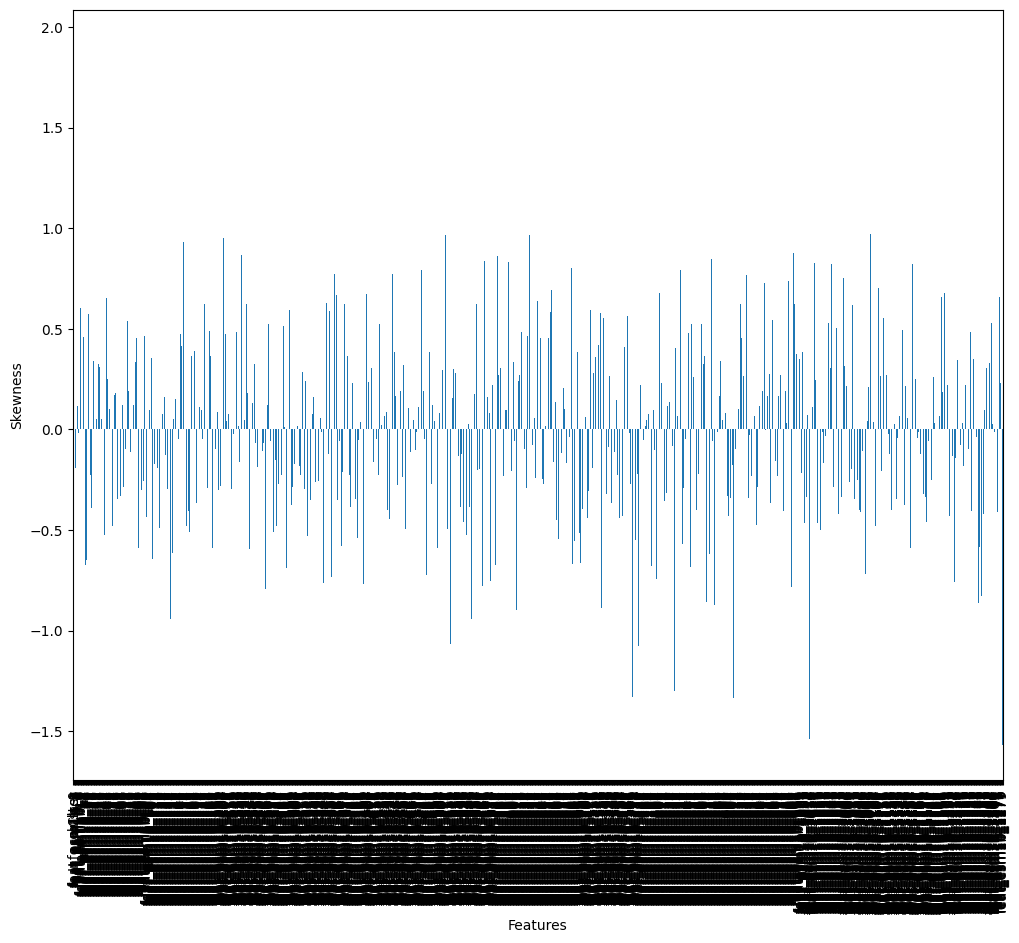

In [ ]:
# Plot the skewness
plt.figure(figsize=(12, 10))
skewness.plot(kind='bar')
plt.xlabel("Features")
plt.ylabel("Skewness")
plt.show()

**Use the automatic_info_classif() module function from the sklearn.feature_selection to calculate the mutual information between each function and the target variable**

In [ ]:
importances = mutual_info_classif(X_train, y_train)

**The mutual information values are stored in the Pandas Series object using the function name as an index.**

In [ ]:
feat_importances=pd.Series(importances,X_train.columns[0:len(X_train.columns)])

**A horizontal bar plot is created to visualize each feature's mutual information values to identify which features are most important for predicting the target variable.**

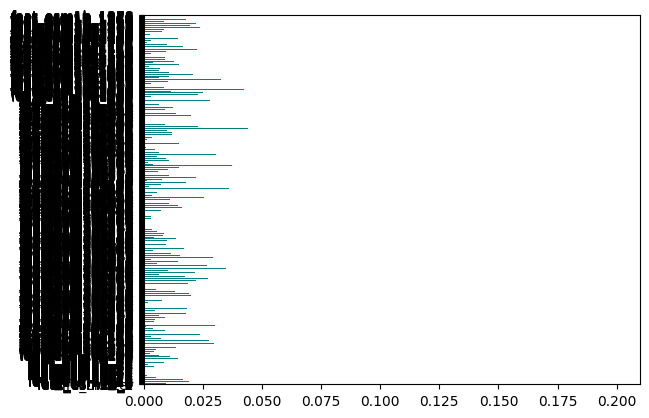

In [ ]:
feat_importances.plot(kind='barh',color='teal')
plt.show()

# 5. Tuning and Pipeline

Tuning models entails optimising their hyperparameters to improve performance. Creating a pipeline simplifies the data preprocessing, feature selection, and model training processes, resulting in a more efficient and organised workflow.  GridSearchCV was used to find the best model parameters through hyperparameter tuning. Grid Search involves testing all possible combinations of hyperparameter values systematically, whereas Randomized Search samples a set number of combinations at random. The model was evaluated using the model evaluation accuracy and the calculated AUC-ROC score from separate data segmentation. This ensures that the performance values reflect generalisation rather than training performance.

**Create a PCA(Principal Component Analysis) object with two components and adapt it to training data and transform both training and test data.**

In [ ]:
# create a PCA object with desired number of components
pca = PCA(n_components=2)

# fit PCA on the training data
pca.fit(train_df)

# transform the data into principal components
train_df_pca = pca.transform(train_df)
test__df_pca = pca.transform(test_df)

**Creates another PCA object with 0.95 variance explained, fits it to the training data, and transforms the training, test, and validation data.**

In [ ]:
# Instantiate PCA with n_components=0.95
pca = PCA(n_components=0.95)

# Fit and transform the training data
train_df_pca = pca.fit_transform(train_df)

# Transform the tuning and validation data
test_df_pca = pca.transform(val_df)
val_df_pca = pca.transform(test_df)

# Print the number of principal components selected
print(f"Number of principal components selected: {pca.n_components_}")

Number of principal components selected: 1


**Instantiate a random forest classifier and Boruta feature selector.**

In [ ]:
# Instantiate a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight='balanced')

# Instantiate Boruta feature selection
boruta_feature_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=42)

**Calculate the total number of examples by counting the number of examples in each cluster. Then, for the training (60%) and testing (40%) datasets, determine the number of examples. In addition, Allocate the clusters to the training and testing datasets and create training and testing datasets based on cluster allocations.**

In [ ]:
cluster_counts = train_df['Info_cluster'].value_counts()
total_examples = len(train_df)

split1_examples = round(total_examples * 0.6)  # Training Data
split2_examples = round(total_examples * 0.4)  # Testing Data

cluster_allocations = {}
for i, count in cluster_counts.items():
    if split1_examples >= count:
        cluster_allocations[i] = 1
        split1_examples -= count
    else:
        cluster_allocations[i] = 2
        split2_examples -= count

train_df = pd.DataFrame()# Training Data
test_df = pd.DataFrame()# Testing Data

for i, allocation in cluster_allocations.items():
    current_rows = df[df['Info_cluster'] == i]
    
    if allocation == 1:
        train_df = train_df.append(current_rows, ignore_index=True)
    else:
        test_df = test_df.append(current_rows, ignore_index=True)
    
    print(f"Info Cluster {i} allocated to split {allocation}")

Info Cluster 35 allocated to split 2
Info Cluster 150 allocated to split 1
Info Cluster 36 allocated to split 1
Info Cluster 298 allocated to split 1
Info Cluster 229 allocated to split 1
Info Cluster 232 allocated to split 1
Info Cluster 198 allocated to split 1
Info Cluster 264 allocated to split 1


**Separate the feature and target columns for the training dataset. Create a RandomUnderSampler object and resample the training data to balance the classes and check the class balance after resampling.**

In [ ]:
# Separate the feature and target columns
X_train = train_df.drop(['Class'], axis=1)
y_train = train_df['Class']

# Create a RandomUnderSampler object
rus = RandomUnderSampler(random_state=42)

# Resample the training data to balance the classes
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

# Check the class balance after resampling
print('Class counts after resampling:', y_train_res.value_counts())

Class counts after resampling: -1    478
 1    478
Name: Class, dtype: int64


In [ ]:
X_train

,Info_cluster,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
0,150,0.099816,0.317347,0.230496,0.012525,0.110873,0.002562,-0.077425,0.018806,0.074725,...,-0.025537,-0.083238,0.012165,0.149844,-0.829057,-0.134383,-0.082184,-0.035591,-0.029210,0.400337
1,150,0.203278,0.193663,0.150712,0.001678,-0.291512,0.035538,-0.368598,-0.392617,-0.371050,...,0.248536,-0.379445,-0.033261,0.056291,-0.596806,-0.228356,0.183571,0.045570,0.206811,0.161657
2,150,-0.065495,0.288112,0.111423,0.049842,-0.214084,0.117622,-0.121742,-0.132868,-0.271488,...,0.113633,-0.180051,0.015753,0.137146,-0.815023,-0.145358,0.153395,0.026982,-0.036898,0.472214
3,150,0.206901,0.250490,0.192996,-0.123496,-0.098696,0.132997,-0.028316,-0.271054,-0.487735,...,0.105232,-0.319095,-0.045829,0.113415,-0.982526,-0.250963,-0.071179,-0.161308,0.007344,0.479956
4,150,0.270380,0.428612,0.280971,-0.177800,-0.171358,-0.079705,-0.046312,-0.118421,-0.256451,...,0.163922,-0.211850,0.325251,0.091875,-0.763167,-0.218848,-0.199391,0.002419,0.282258,0.433124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,264,0.235266,0.221962,0.131317,0.169029,-0.235472,-0.036251,-0.252965,-0.263607,-0.304978,...,0.260312,-0.252815,-0.045772,0.132142,-1.017773,0.010128,0.255110,0.246597,0.106327,0.148797
1023,264,0.055335,0.159791,-0.117944,0.097669,-0.170109,-0.223123,-0.136546,-0.039994,-0.085576,...,0.159566,0.016109,0.128387,0.230946,-1.317455,-0.004275,0.133416,0.204846,0.021654,0.317932
1024,264,0.169163,0.339262,0.133640,0.120485,-0.260865,-0.171683,-0.045191,-0.178462,-0.189057,...,0.314777,-0.153781,0.244404,0.167059,-0.949530,-0.035947,0.105469,0.180098,0.225152,0.386066
1025,264,0.247302,0.375235,0.108852,0.172250,-0.330917,-0.061947,-0.205868,-0.159188,-0.369997,...,0.177878,-0.195864,-0.047665,0.107062,-1.229219,-0.067794,0.226703,0.237601,0.099250,0.251833


**Use SMOTE(Synthetic Minority Over-sampling Technique) to oversample the training data and train a Logistic Regression classifier on the balanced dataset and predict and evaluate the classifier's performance on the testing dataset.**

**Logistic regression classifiers are trained on balanced datasets and their performance is evaluated on validation sets.**

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a classifier on the balanced dataset
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_smote, y_train_smote)

# Predict and evaluate the classifier's performance
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       289
           1       0.44      1.00      0.61       227

    accuracy                           0.44       516
   macro avg       0.22      0.50      0.31       516
weighted avg       0.19      0.44      0.27       516



SMOTE(Synthetic Minority Over-sampling Technique) is an oversampling method that, rather than simply duplicating existing examples, generates synthetic examples of the minority class in an imbalanced dataset. It improves classifier accuracy for the minority class, its simplicity and ease of implementation and its ability to work with various classifiers. However, SMOTE, on the other hand, has limitations, such as sensitivity to noise and outliers in the data, the potential to overfit the training data, and the inability to generate new information beyond what is already present in the dataset.

**A logistic regression classifiers are trained on balanced datasets and their performance is evaluated on validation sets.**

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a classifier on the balanced dataset
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_smote, y_train_smote)

# Predict and evaluate the classifier's performance
y_pred = classifier.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

          -1       0.95      0.98      0.97      1083
           1       0.87      0.67      0.76       176

    accuracy                           0.94      1259
   macro avg       0.91      0.83      0.86      1259
weighted avg       0.94      0.94      0.94      1259



Regression Analysis is a statistical technique that leverages the relationship between two or more quantitative variables to predict dependent variables from independent variables. When the response variable has a binary or qualitative outcome, logistic regression is applied. Given the fitted regression coefficients, it maximises the likelihood of receiving the observed findings. That is, Logistic regression is more resistant to breaches of the normality assumption since it makes no assumptions about the distribution of the independent variables. 

**For hyperparameter tuning, SMOTE objects, logistic regression objects, hyperparameter search spaces, and scoring metrics are defined.**

In [ ]:
# Define the SMOTE object
smote = SMOTE(random_state=42)

# Define the logistic regression object
log_reg = LogisticRegression(random_state=42)

# Define the hyperparameter search space
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter': [100, 500, 1000],
              'class_weight': ['balanced', None]}

# Define the scoring metric
scoring = make_scorer(f1_score)

**Hyperparameter tuning is performed for logistic regression using GridSearchCV with GroupKFold cross-validation. The best scores and hyperparameters are stored.**

In [ ]:
group=np.array(X_val['Info_cluster'])
model = LogisticRegression()

# Define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

# Define group k-fold cross-validator
gkf = GroupKFold(n_splits=5)

# Define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=gkf)

# Fit the model
result = search.fit(X_val, y_val, groups=group)

# Calculate probabilities for the positive class
y_proba = search.predict_proba(X_val)[:, 1]

# Compute ROC AUC score
roc_auc = roc_auc_score(y_val, y_proba)
print('ROC AUC Score:', roc_auc)

# Print best score and hyperparameters
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

BestScore_LogisticRegression = result.best_score_
BestHyperParameters_LogisticRegression = result.best_params_

ROC AUC Score: 1.0
Best Score: nan
Best Hyperparameters: {'C': 1e-05, 'penalty': 'none', 'solver': 'newton-cg'}


**Create the DecisionTreeClassifier model and search space for hyperparameters is defined. in addition, A GroupKFold cross-validator with 5 splits is defined. GridSearchCV is used to find the optimal hyperparameters and score the models based on their accuracy and the model is fit with the validation data and group information. The positive class's probability are computed. The ROC AUC score is then calculated and printed. The best score and hyperparameters are printed and stored.**

In [ ]:
model = DecisionTreeClassifier()

# Define search space
space = dict()
space['criterion'] = ['gini', 'entropy']
space['splitter'] = ['best', 'random']
space['max_depth'] = [None, 1, 2, 4, 6, 8, 10]
space['min_samples_split'] = [2, 5, 10]
space['min_samples_leaf'] = [1, 2, 4]

# Define group k-fold cross-validator
gkf = GroupKFold(n_splits=5)

# Define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=gkf)

# Fit the model
result = search.fit(X_val, y_val, groups=group)

# Calculate probabilities for the positive class
y_proba = search.predict_proba(X_val)[:, 1]

# Compute ROC AUC score
roc_auc = roc_auc_score(y_val, y_proba)
print('ROC AUC Score:', roc_auc)

# Print best score and hyperparameters
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

BestScore_DecisionTree = result.best_score_
BestHyperParameters_DecisionTree = result.best_params_

ROC AUC Score: 1.0
Best Score: 0.8108296943231441
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


Decision tree learning is a predictive model that maps observations about an item to conclusions about the item's target value. A particular branch is chosen based on the results of the test. To classify a specific data item, one would begin at the root node and follow the assertions down until they reached a terminal node (or leaf); at that point, a choice is taken. However, the disadvantage of it is that it should not be used with small datasets. Decision trees are also extremely sensitive to noise in the data, and they attempt to match the data accurately, which is known as "overfitting."

**The Random Forest Classifier procedure is nearly identical to the Decision Tree Classifier process. The main differences are that a RandomForestClassifier model is generated and the hyperparameter search space is slightly different. The search space for hyperparameters is defined. Create a 5-split group k-fold cross-validator and define the grid search using the RandomForestClassifier, search space, scoring metric (accuracy), number of parallel jobs to run (n_jobs=-1), and cross-validation method (cv=gkf). Moreover,fit the grid search to the validation data, X_val and y_val, and the group variable. Calculate the probabilities for the positive class and compute the ROC AUC score. Lastly, print the best score (accuracy) and hyperparameters discovered during the grid search and store the best score and hyperparameters in variables.**

In [ ]:
model = RandomForestClassifier()

# Define search space
space = dict()
space['n_estimators'] = [10, 50, 100, 200]
space['criterion'] = ['gini', 'entropy']
space['max_depth'] = [None, 1, 2, 4, 6, 8, 10]
space['min_samples_split'] = [2, 5, 10]
space['min_samples_leaf'] = [1, 2, 4]

# Define group k-fold cross-validator
gkf = GroupKFold(n_splits=5)

# Define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=gkf)

# Fit the model
result = search.fit(X_val, y_val, groups=group)

# Calculate probabilities for the positive class
y_proba = search.predict_proba(X_val)[:, 1]

# Compute ROC AUC score
roc_auc = roc_auc_score(y_val, y_proba)
print('ROC AUC Score:', roc_auc)

# Print best score and hyperparameters
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

BestScore_RandomForest = result.best_score_
BestHyperParameters_RandomForest = result.best_params_

ROC AUC Score: 0.9990818853353479
Best Score: 0.4240764475698973
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


**Create a pipeline that includes a StandardScaler for feature scaling, a SelectKBest feature selector with mutual_info_classif as the scoring function, and a RandomForestClassifier with the provided hyperparameters. Calculate the accuracy and print the AUC-ROC score**

In [ ]:
pipe=Pipeline([
('scaler', StandardScaler()), ('selector',SelectKBest(score_func=mutual_info_classif)),
('classifier', RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=20, bootstrap=True, class_weight='balanced', random_state=42))
])
#Fit the pipeline to the training data
result=pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print('AUC-ROC score :',roc_auc_score(y_test,y_pred))

AUC-ROC score : 0.5114781336219381


**Read the holdout dataset**

In [ ]:
df = pd.read_csv('df_holdout.csv')
df_new = df.loc[:, ['Info_PepID', 'Info_pos']].copy()
df_holdOut = df.copy()

**Drop irrelevant columns from the holdout dataset**

In [ ]:
cols_to_drop = ['Info_PepID','Info_organism_id','Info_protein_id','Info_pos','Info_AA','Info_pubmed_id',
            'Info_epitope_id','Info_host_id','Info_nPos','Info_nNeg','Info_type','Info_window']
df_holdOut = df_holdOut.drop(cols_to_drop, axis=1)

In [ ]:
common_cols = list(df_holdOut.columns.intersection(X_train.columns))
# select only common columns from both dataframes
df1_common = df_holdOut.loc[:, common_cols]

In [ ]:
df1_common.dropna(inplace=True)
df1_common.drop_duplicates()
y_pred = pipe.predict(df1_common)
#y_pred = res.predict(df1_common)
# print(y_pred)
# print(type(y_pred))
df_new["Prediction"] = pd.DataFrame(y_pred, columns=['Prediction'])

**Save the predictions to a CSV file**

In [ ]:
df_new.to_csv('Shon_Sungkyung_CS4850_predictions.csv', index=False)

# 6. Conclusion

* df_training_level3 Accuracy
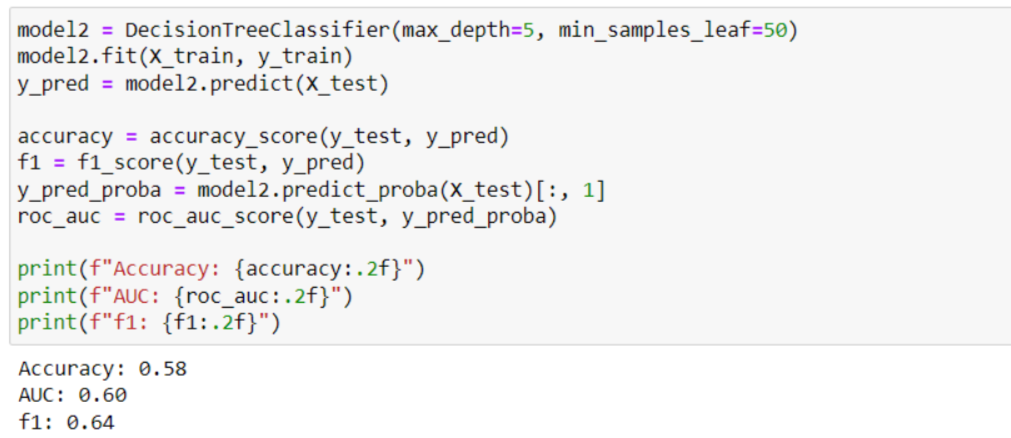

Compared to df_training_level2, df_training_level3 accuracy is higher than df_training_level2. Data mining is an iterative process in which the mining process is refined and new data is incorporated to produce more efficient results. Data Mining satisfies the need for effective, scalable, and adaptable data analysis. We began by investigating the data and determining its distribution, missing values, and variable relationships. We achieved strong performance on both training and test datasets by leveraging feature selection techniques and model optimization.  In addition, We were able to identify the most relevant variables for predicting linear B-cell epitopes using feature selection techniques like t-SNE and mutual information. In our study, model selection was crucial, and we compared the performance of various models, including Decision Tree and Random Forest classifiers. Using more data or combining more diverse data sources in future investigations may increase the model's ability to generalise to new, previously undiscovered epitopes. Furthermore, the performance of the pipeline should not be judged solely on accuracy or AUC-ROC score. It is also critical to validate the created model using independent datasets or cross-validation procedures to ensure that the model's performance is not simply due to overfitting to the training data.

# 7. References

1. David J. Hand. Principles of Data Mining. Drug Safety 2007; 30 (7): 621-622.
2. Joyce Jackson. DATA MINING: A CONCEPTUAL OVERVIEW. Communications of the Association for Information Systems (Volume 8, 2002) pp.267-296.
3. Tukey, John W. Exploratory data analysis. Vol. 2. 1977.
4. Ian H. Witten, Eibe Frank and Mark A. Hall. 
Data Mining: Practical Machine Learning Tools and Techniques. A volume in The Morgan Kaufmann Series in Data Management Systems Third Edition 2011.
5. Himani Sharma, Sunil Kumar. A Survey on Decision Tree Algorithms of
Classification in Data Mining. International Journal of Science and Research (IJSR). pp.2094-2097.
6. N. V. Chawla, K. W. Bowyer, L. O. Hall, W. P. Kegelmeyer. SMOTE: Synthetic Minority Over-sampling Technique. Journal of Artificial Intelligence Research 16 (2002). pp.321–357.
7. Isabelle Guyon, Andre Elisseeff. An Introduction to Variable and Feature Selection. Journal of Machine Learning Research 3 (2003). pp.1157-1182.